# Fox Mulder is a Maniac, an analysis of Mulder's mental state

## Summary
From the Gamefully Unemployed network exists a rewatch podcast of the popular TV show however the hosts observer that the main character, Fox Mulder, is actually unhinged. With this understanding, the two hosts provide among other things, a rating on a scale from 1-10 on how insane Mulder is on a particular episode as well as identifying who or what is enabling Mulder's behavior. Furthermore I add episode types that are recognized categories by the fanbase.

This analysis is exploratory, seeing what sets Mulder off.

## Key Takeaways
If you're here for the facts of what is affecting Mulder, here are the key points:

### What is Mulder's typical mental state?
Mulder on average is a 5.4 on the sanity scale. Where 1-3 is generally weird behavior, 4-6 is seen as Mulder endangering himself, 7-10 is him endangering others with his madness. In every season he hits a 10 at least once. In fact, as time goes by, he becomes *more* likely to hit a 10 where with each passing year (season) Mulder trends upward by 0.22 from 4.1 to 6.6 over the seven seasons analyzed.

### What sets Mulder off? Is it Aliens or Bigfeet in the streets?
Mulder's mental state doesn't really change between types of cases (Mythology, Monster/Mutant, Human, Supernatural) with the exception of when one compares Mythology to Monster/Mutant. Here Mulder is more likely (statistically significant) to lose his mind chasing *The Truth* over big feet and fish people (Avg of 6.6 vs 4.2, respectively).

### Who is letting Mulder do this?
Mulder does not really on a specific enabler to unleash his sanity. Mulder has been enabled by literally everyone including God, Satan, and the Cosmos itself. 

There were a lot of different enablers which I did three rounds of grouping, the second level distinguished between different groups (Mulder himself, Skinner/Scully, Outside Parties such as Govt agencies or allies or incidentaly people, and antagonistic or supernatural forces as Outside Forces). The third level of grouping compared Mulder to everything else. 

When combined Skinner and Scully contribute to about a THIRD of the enabling with Scully alone constituting a QUARTER of all enablings. Furthermore, outside parties such as Government officials or episode specific tag-alongs contribute to another quarter of enablings. Mulder can be expected to enable himself in about 1 in 5 episodes. All enabler types permitted 10s and low numbers so nothing stood out there statistically. **However**, there were three occassions where Scully and Skinner were identified as equal contributors to Mulder's behavior and in that case **it was always a 10**

Mulder is on average more insane when he is left to his own devices will be worse by a full point when compared to anything else enabling him (6.3 vs 5.3, statisically significant). **DO NOT LEAVE MULDER ALONE**

## Conclusions

Do. Not. Leave. Mulder. Alone. He needs to be watched. Furthermore, keep Mulder away from government conspiracies. Rather, let Mulder run around in the woods chasing dogmen or serial killers which on average he will just endanger himself rather than others. It was actually a good decisions for the FBI to put Scully onto the X-files, it probably saved his life even if it ruined Scully's life.

# Importing packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri as cmc
from tkinter import*
import statsmodels.api as sm
from statsmodels.formula.api import ols
from ISLP.models import (ModelSpec as MS, summarize , poly)

In [2]:
def import_csv_as_dataframe():
    """
    grabs the related CSV file and imports it as a dataframe using a GUI
    """
    
    # Create Tk root
    root = Tk()
    # Hide the main window
    root.withdraw()
    root.call("wm", "attributes", ".", "-topmost", True)
        
    from tkinter import filedialog
    csv_data = pd.read_csv(filedialog.askopenfilename(multiple=False))
    
    %gui tk
    
    return csv_data

def pie_plot_pct(x):
    return '{:.1f}%'.format(x)

In [3]:
fmiam_data = import_csv_as_dataframe()

FIGURE_FONT_SIZE = 14

In [4]:
fmiam_data

,season,episode,adversary,rating,enabler type,enabler
0,1.0,1,Mythology,3.0,Government Agency/Officials,FBI
1,1.0,2,Mythology,4.0,Shadow Government,Deepthroat/Shadow Government
2,1.0,3,Monster/Mutant,2.0,Scully,Scully
3,1.0,4,Human,4.0,Government Agency/Officials,FBI
4,1.0,5,Monster/Mutant,5.0,Scully,Scully
...,...,...,...,...,...,...
157,7.0,18,Monster/Mutant,2.0,Scully,Scully
158,7.0,19,Monster/Mutant,4.0,Skinner,Skinner
159,7.0,20,Supernatural,5.0,Scully,Scully
160,7.0,21,Supernatural,10.0,Mulder,Mulder


# Basic Information on Mulder's Ratings

In [5]:
fmiam_data["rating"].describe()

count    160.000000
mean       5.443750
std        2.816722
min        1.000000
25%        3.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: rating, dtype: float64

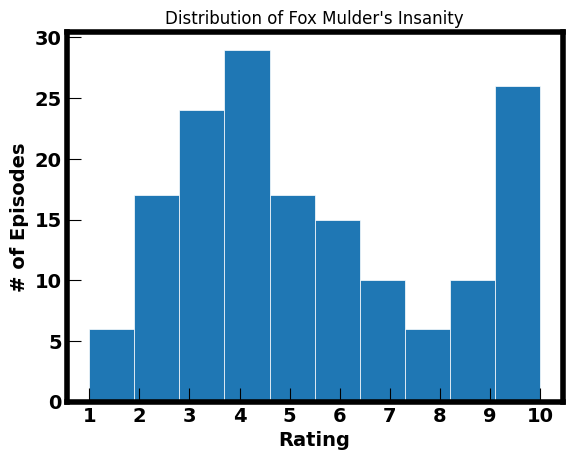

In [6]:
fig, ax = plt.subplots()

ax.hist(fmiam_data["rating"], bins = 10, linewidth=0.5, edgecolor="white")

ax.set_xlabel("Rating", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax.set_ylabel("# of Episodes", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax.set_title("Distribution of Fox Mulder's Insanity")

plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks
plt.xticks(np.linspace(1,10,10),fontsize=FIGURE_FONT_SIZE, fontweight='bold')
plt.yticks(fontsize=FIGURE_FONT_SIZE, fontweight='bold')

plt.box(True)
plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness

plt.show()

# How does Mulder react to different types of investigations?

In [7]:
fmiam_data_nanremoved = fmiam_data.dropna()
fmiam_data_groupedby_eptype = fmiam_data_nanremoved.groupby("adversary")
fmiam_data_groupedby_eptype["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
adversary,,,,,,,,
Human,26.0,5.153846,2.781256,1.0,3.0,5.0,6.75,10.0
Monster/Mutant,31.0,4.161290,2.409658,1.0,2.5,4.0,6.00,10.0
Mythology,52.0,6.596154,2.844049,2.0,4.0,6.5,9.25,10.0
Supernatural,50.0,5.260000,2.655837,1.0,3.0,4.5,7.00,10.0


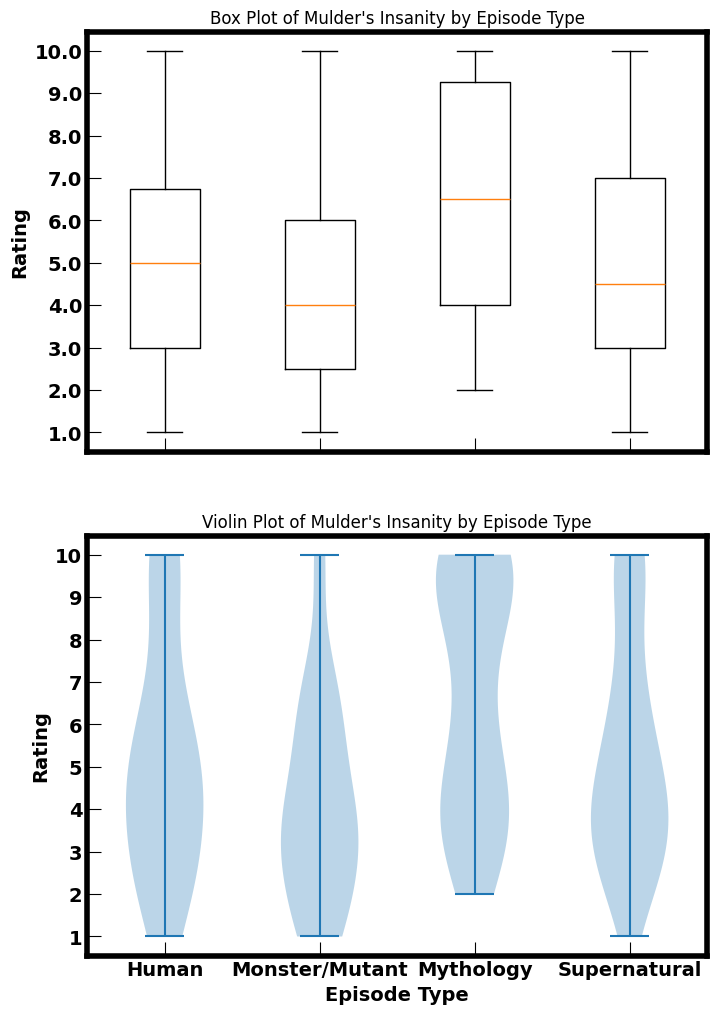

C:\Users\Wess\AppData\Local\Temp\ipykernel_10720\3141898469.py:53: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax3.legend(pieplot, labels = fmiam_data_groupedby_eptype.groups.keys())


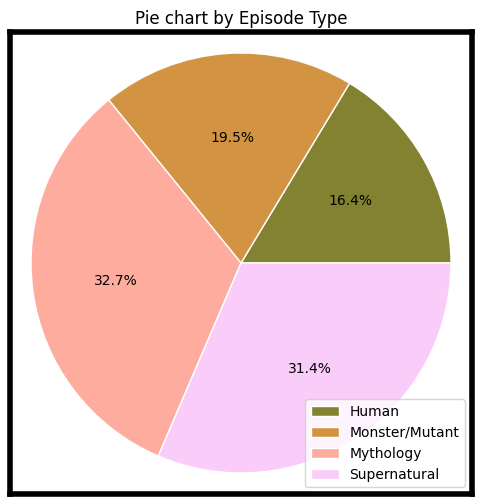

In [8]:
# Init a figure and axes
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize=(8, 12))

# Create the plot with different colors for each group
boxplot = ax1.boxplot(x=[group.values for name, group in fmiam_data_groupedby_eptype["rating"]])

# ax1.set_xlabel("Episode Type", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax1.set_ylabel("Rating", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax1.set_xticks(ticks = list(range(1, len(fmiam_data_groupedby_eptype)+1)), 
               labels = fmiam_data_groupedby_eptype.groups.keys())
ax1.set_yticks(ticks = np.linspace(1, 10, 10))
ax1.set_title("Box Plot of Mulder's Insanity by Episode Type")
ax1.tick_params(axis='both', direction='in', length=10, labelsize=FIGURE_FONT_SIZE)  # Set the length of tick marks
ax1.set_yticklabels(ax1.get_yticks(), weight = "bold")

ax1.spines['top'].set_linewidth(4)    # Set top spine thickness
ax1.spines['bottom'].set_linewidth(4) # Set bottom spine thickness
ax1.spines['left'].set_linewidth(4)   # Set left spine thickness
ax1.spines['right'].set_linewidth(4)  # Set right spine thickness

# Create the plot with different colors for each group
violinplot = ax2.violinplot([group.values for name, group in fmiam_data_groupedby_eptype["rating"]])

ax2.set_xlabel("Episode Type", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax2.set_ylabel("Rating", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax2.set_xticks(ticks = list(range(1, len(fmiam_data_groupedby_eptype)+1)),
               labels = fmiam_data_groupedby_eptype.groups.keys())
ax2.set_yticks(ticks = np.linspace(1, 10, 10))
ax2.set_title("Violin Plot of Mulder's Insanity by Episode Type")

plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks
plt.xticks(fontsize=FIGURE_FONT_SIZE, fontweight='bold')
plt.yticks(fontsize=FIGURE_FONT_SIZE, fontweight='bold')

ax2.spines['top'].set_linewidth(4)    # Set top spine thickness
ax2.spines['bottom'].set_linewidth(4) # Set bottom spine thickness
ax2.spines['left'].set_linewidth(4)   # Set left spine thickness
ax2.spines['right'].set_linewidth(4)  # Set right spine thickness

# Display it
plt.show()


fig3, ax3 = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
pieplot = ax3.pie(fmiam_data_groupedby_eptype["rating"].count(),\
                  autopct = pie_plot_pct,
                  wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
                  frame=True,
                  colors = cmc.cm.batlow(np.linspace(0.5,1, fmiam_data_groupedby_eptype.ngroups)))

ax3.legend(pieplot, labels = fmiam_data_groupedby_eptype.groups.keys())

ax3.set_title("Pie chart by Episode Type")


plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks
plt.xticks([],fontsize=FIGURE_FONT_SIZE, fontweight='bold')
plt.yticks([],fontsize=FIGURE_FONT_SIZE, fontweight='bold')

plt.box(True)
plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness



# Display it
plt.show()

In [9]:
#One-Way ANOVA
ep_type_model = ols("rating ~ C(adversary)", data = fmiam_data_nanremoved).fit()
ep_type_anova_table = sm.stats.anova_lm(ep_type_model, type=2)

print(ep_type_anova_table)

                 df       sum_sq    mean_sq        F    PR(>F)
C(adversary)    3.0   123.842354  41.280785  5.68395  0.001018
Residual      155.0  1125.717395   7.262693      NaN       NaN


In [10]:
ep_type_tukey_result = sm.stats.multicomp.pairwise_tukeyhsd(endog = fmiam_data_nanremoved['rating'],
                                         groups = fmiam_data_nanremoved['adversary'],
                                         alpha = 0.05)

print(ep_type_tukey_result)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------
         Human Monster/Mutant  -0.9926 0.5107 -2.8538 0.8687  False
         Human      Mythology   1.4423 0.1202 -0.2388 3.1234  False
         Human   Supernatural   0.1062 0.9985 -1.5861 1.7984  False
Monster/Mutant      Mythology   2.4349 0.0006  0.8467  4.023   True
Monster/Mutant   Supernatural   1.0987 0.2852 -0.5013 2.6987  False
     Mythology   Supernatural  -1.3362 0.0633 -2.7224 0.0501  False
-------------------------------------------------------------------


# Who enables Mulder?

In [11]:
fmiam_data_groupedby_enabler = fmiam_data_nanremoved.groupby("enabler type")
fmiam_data_groupedby_enabler["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
enabler type,,,,,,,,
Antagonist,10.0,4.300000,2.626785,1.0,2.25,4.5,5.75,9.0
Cosmological Being,10.0,6.500000,2.635231,3.0,4.50,6.5,8.50,10.0
Government Agency/Officials,20.0,5.300000,3.180533,1.0,3.00,4.0,9.00,10.0
Mulder,26.0,6.346154,2.827611,2.0,4.00,6.0,9.75,10.0
Person of Interest/Ally,14.0,5.071429,2.973325,1.0,3.00,4.0,6.75,10.0
Scully,35.0,4.600000,2.511152,1.0,3.00,4.0,6.00,10.0
Shadow Government,13.0,4.615385,2.631174,1.0,3.00,4.0,5.00,10.0
Skinner,22.0,5.818182,2.519190,2.0,4.00,5.0,8.00,10.0
Skinner/Scully,3.0,10.000000,0.000000,10.0,10.00,10.0,10.00,10.0


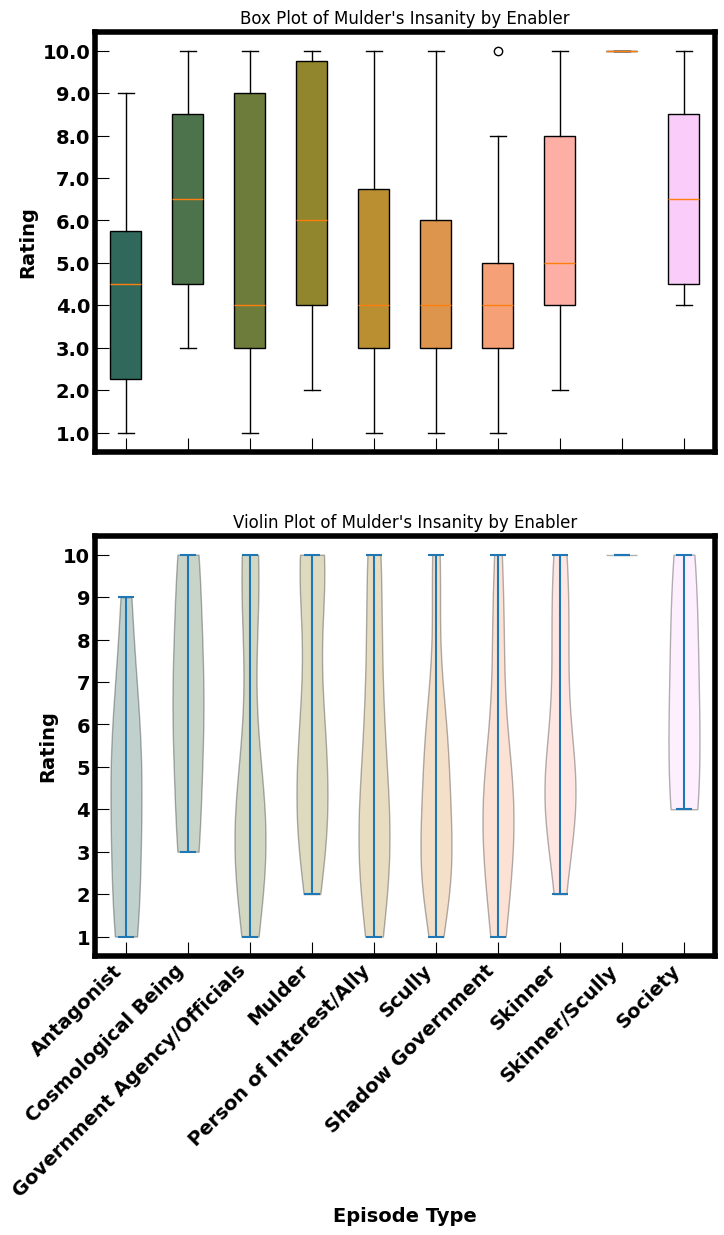

C:\Users\Wess\AppData\Local\Temp\ipykernel_10720\1756188908.py:104: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  plt.legend(pieplot, labels = fmiam_data_groupedby_enabler.groups.keys(), bbox_to_anchor=(1,0.5), loc="center right", fontsize=10,


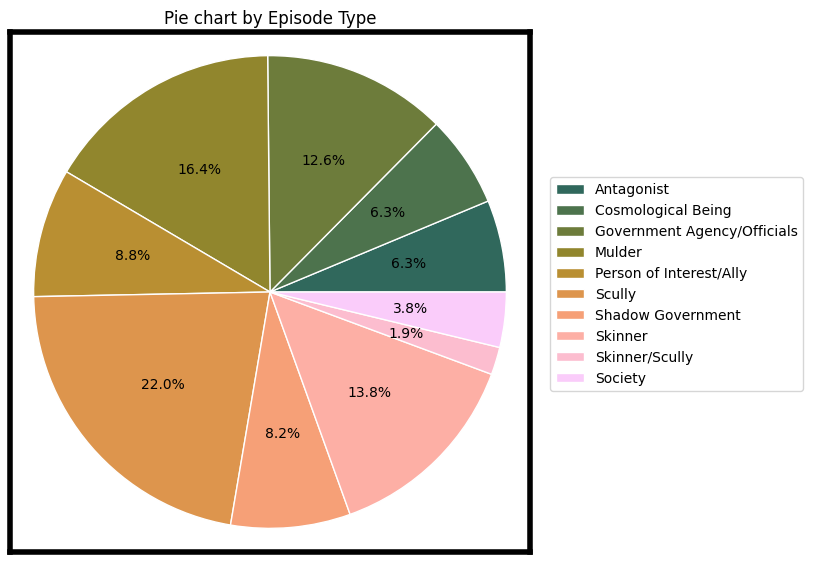

In [12]:
# Init a figure and axes
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize=(8, 12))

# Create the plot with different colors for each group
boxplot = ax1.boxplot(x=[group.values for name, group in fmiam_data_groupedby_enabler["rating"]],
                     patch_artist = True)

for patch, color in zip(boxplot['boxes'], cmc.cm.batlow(np.linspace(0.3,1, fmiam_data_groupedby_enabler.ngroups))):
    patch.set_facecolor(color)

ax1.set_ylabel("Rating", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax1.set_xticks(ticks = list(range(1, len(fmiam_data_groupedby_enabler)+1)), 
               labels = fmiam_data_groupedby_enabler.groups.keys(),
               rotation = 45, ha = 'right')
ax1.set_title("Box Plot of Mulder's Insanity by Enabler")

ax1.set_yticks(ticks = np.linspace(1, 10, 10))

ax1.tick_params(axis='both', direction='in', length=10, labelsize=FIGURE_FONT_SIZE)  # Set the length of tick marks
ax1.set_yticklabels(ax1.get_yticks(), weight = "bold")

ax1.spines['top'].set_linewidth(4)    # Set top spine thickness
ax1.spines['bottom'].set_linewidth(4) # Set bottom spine thickness
ax1.spines['left'].set_linewidth(4)   # Set left spine thickness
ax1.spines['right'].set_linewidth(4)  # Set right spine thickness


# # Display it
# plt.show()

# fig2, ax2 = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
violinplot = ax2.violinplot([group.values for name, group in fmiam_data_groupedby_enabler["rating"]])

for pc, color in zip(violinplot['bodies'], cmc.cm.batlow(np.linspace(0.3,1, fmiam_data_groupedby_enabler.ngroups))):
    pc.set_facecolor(color)
    pc.set_edgecolor('k')

ax2.set_xlabel("Episode Type", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax2.set_ylabel("Rating", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax2.set_xticks(ticks = list(range(1, len(fmiam_data_groupedby_enabler)+1)), 
               labels = fmiam_data_groupedby_enabler.groups.keys(),
               rotation = 45, ha = 'right', 
               fontsize=FIGURE_FONT_SIZE, 
               fontweight='bold')
ax2.set_title("Violin Plot of Mulder's Insanity by Enabler")
ax2.set_yticks(ticks = np.linspace(1, 10, 10))

plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks
plt.xticks(fontsize=FIGURE_FONT_SIZE, fontweight='bold')
plt.yticks(fontsize=FIGURE_FONT_SIZE, fontweight='bold')

ax2.spines['top'].set_linewidth(4)    # Set top spine thickness
ax2.spines['bottom'].set_linewidth(4) # Set bottom spine thickness
ax2.spines['left'].set_linewidth(4)   # Set left spine thickness
ax2.spines['right'].set_linewidth(4)  # Set right spine thickness


# Display it
plt.show()


# fig3, ax3 = plt.subplots(figsize=(8, 6))

# # Create the plot with different colors for each group
# pieplot = ax3.pie(fmiam_data_groupedby_enabler["rating"].count(),
#                      wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
#                      frame=True)

# ax3.legend(pieplot, labels = fmiam_data_groupedby_enabler.groups.keys())

# ax3.set_title("Pie chart by Enabler")

# # Display it
# plt.show()



fig3, ax3 = plt.subplots(figsize=(8, 8))

# Create the plot with different colors for each group
pieplot = ax3.pie(fmiam_data_groupedby_enabler["rating"].count(),\
                  autopct = pie_plot_pct,
                  wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
                  frame=True,
                  colors = cmc.cm.batlow(np.linspace(0.3,1, fmiam_data_groupedby_enabler.ngroups)))

# ax3.legend(pieplot, labels = fmiam_data_groupedby_enabler.groups.keys())

ax3.set_title("Pie chart by Episode Type")


plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks
plt.xticks([],fontsize=FIGURE_FONT_SIZE, fontweight='bold')
plt.yticks([],fontsize=FIGURE_FONT_SIZE, fontweight='bold')

plt.box(True)
plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness

plt.legend(pieplot, labels = fmiam_data_groupedby_enabler.groups.keys(), bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.65)

# Display it
plt.show()

## There are clearly a lot of enablers, let's condense it down a bit and see what we find

In [13]:
fmiam_data_nanremoved_modified = fmiam_data_nanremoved
fmiam_data_nanremoved_modified.loc[:, 'mod_enabler'] = ''

for index, row in fmiam_data_nanremoved_modified.iterrows():
    if fmiam_data_nanremoved_modified.loc[index, 'enabler type'] in ["Skinner", 
                                                                     "Scully", 
                                                                     "Skinner/Scully"]:
        fmiam_data_nanremoved_modified.loc[index, 'mod_enabler'] = 'Skinner/Scully'
        
    elif fmiam_data_nanremoved_modified.loc[index, 'enabler type'] in ["Antagonist", 
                                                                       "Cosmological Being", 
                                                                       "Shadow Government"]:
        fmiam_data_nanremoved_modified.loc[index, 'mod_enabler'] = 'Outside Force'
        
    elif fmiam_data_nanremoved_modified.loc[index, 'enabler type'] in ["Government Agency/Officials", 
                                                                       "Society", 
                                                                       "Person of Interest/Ally"]:
        fmiam_data_nanremoved_modified.loc[index, 'mod_enabler'] = 'Outside Parties'
        
    elif fmiam_data_nanremoved_modified.loc[index, 'enabler type'] == 'Mulder':
        fmiam_data_nanremoved_modified.loc[index, 'mod_enabler'] = 'Mulder'
        
print(fmiam_data_nanremoved_modified)

     season  episode       adversary  rating                 enabler type  \
0       1.0        1       Mythology     3.0  Government Agency/Officials   
1       1.0        2       Mythology     4.0            Shadow Government   
2       1.0        3  Monster/Mutant     2.0                       Scully   
3       1.0        4           Human     4.0  Government Agency/Officials   
4       1.0        5  Monster/Mutant     5.0                       Scully   
..      ...      ...             ...     ...                          ...   
157     7.0       18  Monster/Mutant     2.0                       Scully   
158     7.0       19  Monster/Mutant     4.0                      Skinner   
159     7.0       20    Supernatural     5.0                       Scully   
160     7.0       21    Supernatural    10.0                       Mulder   
161     7.0       22       Mythology    10.0                      Skinner   

                          enabler      mod_enabler  
0                     

C:\Users\Wess\AppData\Local\Temp\ipykernel_10720\2320735699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fmiam_data_nanremoved_modified.loc[:, 'mod_enabler'] = ''


In [14]:
fmiam_data_groupedby_enabler_modified = fmiam_data_nanremoved_modified.groupby("mod_enabler")
fmiam_data_groupedby_enabler_modified["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
mod_enabler,,,,,,,,
Mulder,26.0,6.346154,2.827611,2.0,4.0,6.0,9.75,10.0
Outside Force,33.0,5.090909,2.719876,1.0,3.0,5.0,7.00,10.0
Outside Parties,40.0,5.425000,2.994760,1.0,3.0,4.0,9.00,10.0
Skinner/Scully,60.0,5.316667,2.721488,1.0,3.0,5.0,7.25,10.0


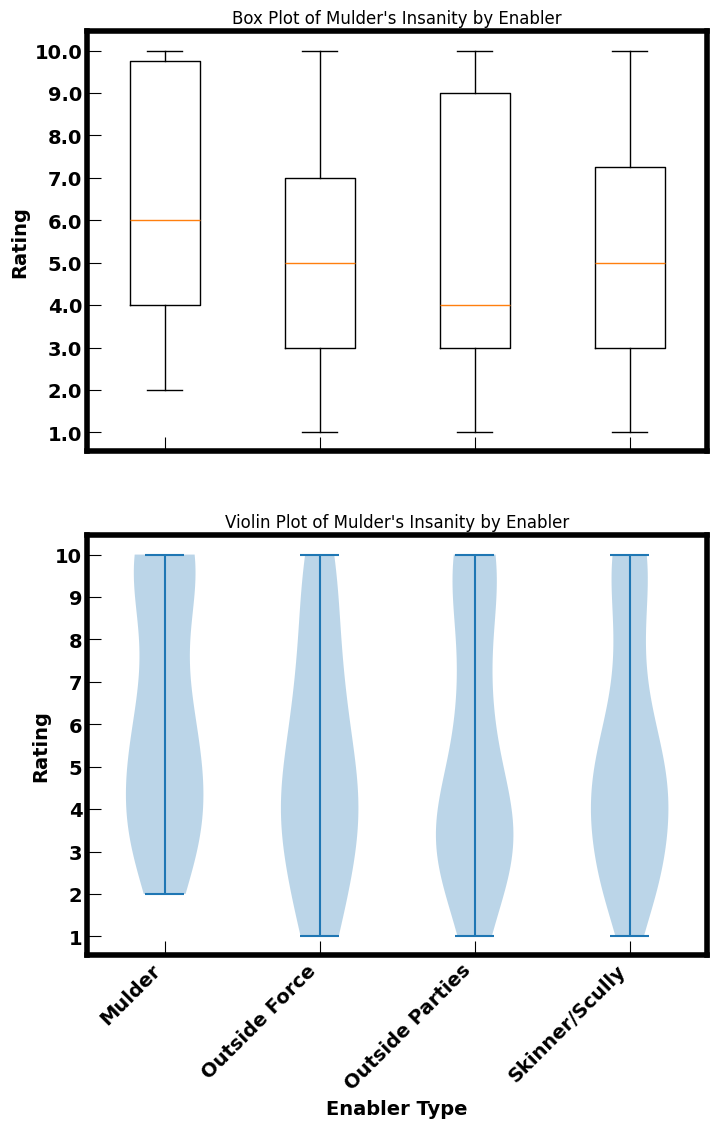

C:\Users\Wess\AppData\Local\Temp\ipykernel_10720\2088655345.py:69: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  ax3.legend(pieplot, labels = fmiam_data_groupedby_enabler_modified.groups.keys())


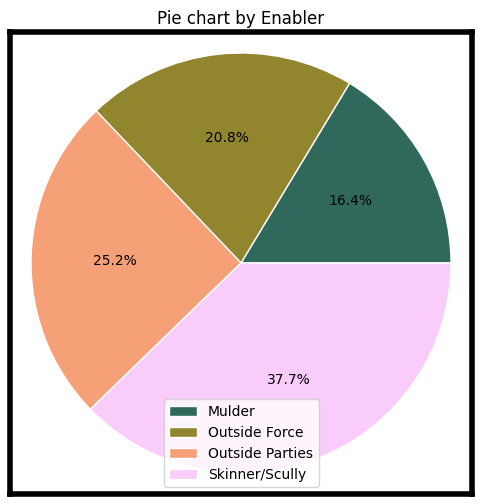

In [15]:
# Init a figure and axes
fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize=(8, 12))

# Create the plot with different colors for each group
boxplot = ax1.boxplot(x=[group.values for name, group in fmiam_data_groupedby_enabler_modified["rating"]])

ax1.set_title("Box Plot of Mulder's Insanity by Enabler")
ax1.set_ylabel("Rating", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax1.set_xticks(ticks = list(range(1, len(fmiam_data_groupedby_enabler_modified)+1)))
ax1.set_title("Box Plot of Mulder's Insanity by Enabler")

ax1.set_yticks(ticks = np.linspace(1, 10, 10))

ax1.tick_params(axis='both', direction='in', length=10, labelsize=FIGURE_FONT_SIZE)  # Set the length of tick marks
ax1.set_yticklabels(ax1.get_yticks(), weight = "bold")

ax1.spines['top'].set_linewidth(4)    # Set top spine thickness
ax1.spines['bottom'].set_linewidth(4) # Set bottom spine thickness
ax1.spines['left'].set_linewidth(4)   # Set left spine thickness
ax1.spines['right'].set_linewidth(4)  # Set right spine thickness

# Create the plot with different colors for each group
violinplot = ax2.violinplot([group.values for name, group in fmiam_data_groupedby_enabler_modified["rating"]])

ax2.set_title("Violin Plot of Mulder's Insanity by Enabler")
ax2.set_xlabel("Enabler Type", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax2.set_ylabel("Rating", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax2.set_xticks(ticks = list(range(1, len(fmiam_data_groupedby_enabler_modified)+1)), 
               labels = fmiam_data_groupedby_enabler_modified.groups.keys(),
               rotation = 45, ha = 'right', 
               fontsize=FIGURE_FONT_SIZE, 
               fontweight='bold')
ax2.set_title("Violin Plot of Mulder's Insanity by Enabler")
ax2.set_yticks(ticks = np.linspace(1, 10, 10))

plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks
plt.xticks(fontsize=FIGURE_FONT_SIZE, fontweight='bold')
plt.yticks(fontsize=FIGURE_FONT_SIZE, fontweight='bold')

ax2.spines['top'].set_linewidth(4)    # Set top spine thickness
ax2.spines['bottom'].set_linewidth(4) # Set bottom spine thickness
ax2.spines['left'].set_linewidth(4)   # Set left spine thickness
ax2.spines['right'].set_linewidth(4)  # Set right spine thickness


# Display it
plt.show()


fig3, ax3 = plt.subplots(figsize=(8, 6))

# Create the plot with different colors for each group
pieplot = ax3.pie(fmiam_data_groupedby_enabler_modified["rating"].count(),
                  wedgeprops={"linewidth": 1, "edgecolor": "white"}, 
                  autopct = pie_plot_pct,
                  frame=True,
                  colors = cmc.cm.batlow(np.linspace(0.3,1, fmiam_data_groupedby_enabler_modified.ngroups)))

plt.tick_params(axis='both', direction='in', length=10)  # Set the length of tick marks
plt.xticks([],fontsize=FIGURE_FONT_SIZE, fontweight='bold')
plt.yticks([],fontsize=FIGURE_FONT_SIZE, fontweight='bold')

plt.box(True)
plt.gca().spines['top'].set_linewidth(4)    # Set top spine thickness
plt.gca().spines['bottom'].set_linewidth(4) # Set bottom spine thickness
plt.gca().spines['left'].set_linewidth(4)   # Set left spine thickness
plt.gca().spines['right'].set_linewidth(4)  # Set right spine thickness

ax3.legend(pieplot, labels = fmiam_data_groupedby_enabler_modified.groups.keys())

ax3.set_title("Pie chart by Enabler")

# Display it
plt.show()

In [16]:
#One-Way ANOVA
enabler_type_model = ols("rating ~ C(mod_enabler)", data = fmiam_data_nanremoved_modified).fit()
enabler_type_anova_table = sm.stats.anova_lm(enabler_type_model, type=2)

In [17]:
print(enabler_type_anova_table)

                   df       sum_sq   mean_sq         F    PR(>F)
C(mod_enabler)    3.0    26.189527  8.729842  1.106064  0.348518
Residual        155.0  1223.370221  7.892711       NaN       NaN


In [18]:
enabler_mod_type_tukey_result = sm.stats.multicomp.pairwise_tukeyhsd(endog = fmiam_data_nanremoved_modified['rating'],
                                         groups = fmiam_data_nanremoved_modified['mod_enabler'],
                                         alpha = 0.05)

print(enabler_mod_type_tukey_result)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
         Mulder   Outside Force  -1.2552 0.3252 -3.1686 0.6581  False
         Mulder Outside Parties  -0.9212 0.5633 -2.7592 0.9169  False
         Mulder  Skinner/Scully  -1.0295 0.4041 -2.7426 0.6836  False
  Outside Force Outside Parties   0.3341 0.9576 -1.3818 2.0499  False
  Outside Force  Skinner/Scully   0.2258 0.9825 -1.3555 1.8071  False
Outside Parties  Skinner/Scully  -0.1083 0.9976 -1.5977  1.381  False
---------------------------------------------------------------------


## Since nothing stood out, let's see how Mulder being left alone compares to when he is enabled by someone else

In [19]:
fmiam_data_nanremoved_modified_muld_v_all = fmiam_data_nanremoved_modified

for index, row in fmiam_data_nanremoved_modified_muld_v_all.iterrows():
    if fmiam_data_nanremoved_modified_muld_v_all.loc[index, 'enabler type'] == 'Mulder':
        fmiam_data_nanremoved_modified_muld_v_all.loc[index, 'mod_enabler'] = 'Mulder'
    else:
        fmiam_data_nanremoved_modified_muld_v_all.loc[index, 'mod_enabler'] = 'Everything Else'

In [20]:
fmiam_data_nanremoved_modified_muld_v_all

,season,episode,adversary,rating,enabler type,enabler,mod_enabler
0,1.0,1,Mythology,3.0,Government Agency/Officials,FBI,Everything Else
1,1.0,2,Mythology,4.0,Shadow Government,Deepthroat/Shadow Government,Everything Else
2,1.0,3,Monster/Mutant,2.0,Scully,Scully,Everything Else
3,1.0,4,Human,4.0,Government Agency/Officials,FBI,Everything Else
4,1.0,5,Monster/Mutant,5.0,Scully,Scully,Everything Else
...,...,...,...,...,...,...,...
157,7.0,18,Monster/Mutant,2.0,Scully,Scully,Everything Else
158,7.0,19,Monster/Mutant,4.0,Skinner,Skinner,Everything Else
159,7.0,20,Supernatural,5.0,Scully,Scully,Everything Else
160,7.0,21,Supernatural,10.0,Mulder,Mulder,Mulder


In [21]:
#One-Way ANOVA
enabler_type_mulder_v_all_model = ols("rating ~ C(mod_enabler)", data = fmiam_data_nanremoved_modified_muld_v_all).fit()
enabler_type_mulder_v_all_anova_table = sm.stats.anova_lm(enabler_type_mulder_v_all_model, type=2)
print(enabler_type_mulder_v_all_anova_table)

                   df       sum_sq    mean_sq         F   PR(>F)
C(mod_enabler)    1.0    24.111223  24.111223  3.089042  0.08077
Residual        157.0  1225.448525   7.805405       NaN      NaN


In [22]:
fmiam_data_groupedby_enabler_mulder_v_all_modified = fmiam_data_nanremoved_modified_muld_v_all.groupby("mod_enabler")
fmiam_data_groupedby_enabler_mulder_v_all_modified["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
mod_enabler,,,,,,,,
Everything Else,133.0,5.293233,2.787369,1.0,3.0,5.0,7.00,10.0
Mulder,26.0,6.346154,2.827611,2.0,4.0,6.0,9.75,10.0


# Does Mulder lose his mind over time?

In [23]:
fmiam_data_groupedby_season = fmiam_data_nanremoved.groupby("season")
fmiam_data_groupedby_season["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1.0,24.0,4.083333,2.062431,1.0,3.00,4.0,5.00,10.0
2.0,25.0,4.600000,2.198484,2.0,3.00,4.0,5.00,10.0
3.0,24.0,5.083333,2.733316,1.0,3.00,4.5,7.00,10.0
4.0,23.0,5.695652,3.154143,2.0,3.00,4.0,9.00,10.0
5.0,18.0,6.277778,2.845131,1.0,4.25,6.5,8.75,10.0
5.5,1.0,3.000000,NaN,3.0,3.00,3.0,3.00,3.0
6.0,22.0,6.454545,2.873976,2.0,4.00,6.5,9.00,10.0
7.0,22.0,6.590909,3.065306,2.0,4.00,6.0,10.00,10.0


In [24]:
fmiam_data_nanremoved_season_modified = fmiam_data_nanremoved
fmiam_data_nanremoved_season_modified.loc[:, "season"] = fmiam_data_nanremoved.loc[:,"season"].replace(5.5, 5)

In [25]:
fmiam_data_groupedby_season_modified = fmiam_data_nanremoved_season_modified.groupby("season")

fmiam_data_groupedby_season_modified["rating"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1.0,24.0,4.083333,2.062431,1.0,3.0,4.0,5.0,10.0
2.0,25.0,4.600000,2.198484,2.0,3.0,4.0,5.0,10.0
3.0,24.0,5.083333,2.733316,1.0,3.0,4.5,7.0,10.0
4.0,23.0,5.695652,3.154143,2.0,3.0,4.0,9.0,10.0
5.0,19.0,6.105263,2.865402,1.0,3.5,6.0,8.5,10.0
6.0,22.0,6.454545,2.873976,2.0,4.0,6.5,9.0,10.0
7.0,22.0,6.590909,3.065306,2.0,4.0,6.0,10.0,10.0


In [26]:
fmiam_season_trend_ratings_depvalues = pd.DataFrame({'intercept': np.ones(fmiam_data_nanremoved_season_modified.shape[0]),
                                                     'rating': fmiam_data_nanremoved_season_modified['rating']})

In [27]:
fmiam_season_model = sm.OLS(fmiam_data_nanremoved_season_modified['season'],
                            fmiam_season_trend_ratings_depvalues)
fmiam_season_results = fmiam_season_model.fit()

In [28]:
summarize(fmiam_season_results)

,coef,std err,t,P>|t|
intercept,2.6600,0.334,7.967,0.0
rating,0.2256,0.054,4.151,0.0


In [29]:
def abline(ax , b, m, *args , **kwargs): 
    "Add a line with slope m and intercept b to ax" 
    xlim = ax.get_xlim() 
    ylim = [m * xlim[0] + b, m * xlim[1] + b] 
    ax.plot(xlim, ylim, *args, **kwargs)


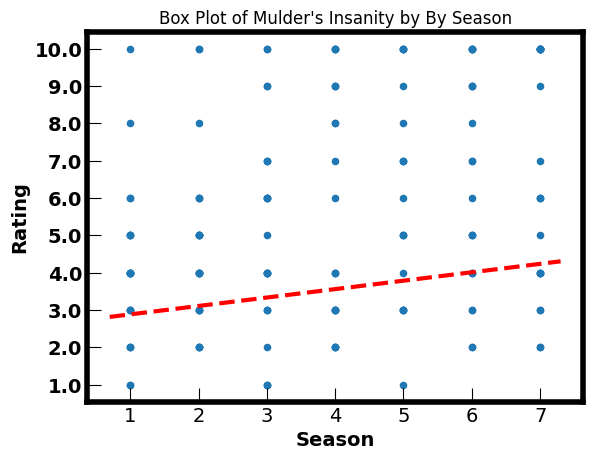

In [36]:
ax = fmiam_data_nanremoved_season_modified.plot.scatter('season', 'rating')
abline(ax,
       fmiam_season_results.params.iloc[0],
       fmiam_season_results.params.iloc[1],
       'r--',
       linewidth = 3)

ax.set_title("Box Plot of Mulder's Insanity by By Season")
ax.set_xticks(ticks = list(range(1, 8)))

ax.set_yticks(ticks = np.linspace(1, 10, 10))

ax.tick_params(axis='both', direction='in', length=10, labelsize=FIGURE_FONT_SIZE)  # Set the length of tick marks
ax.set_yticklabels(ax.get_yticks(), weight = "bold")

ax.set_xlabel("Season", size = FIGURE_FONT_SIZE, fontweight = 'bold')
ax.set_ylabel("Rating", size = FIGURE_FONT_SIZE, fontweight = 'bold')

ax.spines['top'].set_linewidth(4)    # Set top spine thickness
ax.spines['bottom'].set_linewidth(4) # Set bottom spine thickness
ax.spines['left'].set_linewidth(4)   # Set left spine thickness
ax.spines['right'].set_linewidth(4)  # Set right spine thickness